In [ ]:
'''
Name: Sadie Murray
Python Version 3
Summary: The goal of this code is to take data from a website in CSV form, extract certain the airport locations, calculate the distances 
between airports and visualize that data as a histogram. The lab uses four coding challenges or steps to accomplish this: first, the code downloads
the airports and sets up a loop that can print airports for a given country. It takes the airport.dat csv as an input and produces a list of 
airports by country as an output. Coding Challenge 2 places the latitude and longitude of the airport into a dictionary using aiport ID as a field. 
Similarly, "airports.dat" csv is the input while the two dictionaries containing the latitudes and longitudes are the outputs. Code challenge 3
calculates the distance between the airports. It uses the distance function, the latitude and longitude values and the "routes.dat" csv as an 
input and produces a list of distances as an output. Coding challenge 4 creates a histogram of distances. It takes the list of distances as 
an input and produces a histogram as an output. 
'''



Saving Camp_stats.csv to Camp_stats.csv


In [ ]:
'''
Coding Challenge 1
'''

# Upload the "airport.dat" file found in the data folder of this repository here.
from google.colab import files
uploaded = files.upload()

#sets up function 
def countryairports(country): #function takes a country as an argument 
  import csv                  #imports the airports
  f = open("airports.dat")    #opens the airports
  for row in csv.reader(f):   #starts a for loop iterating through all the data
    if row[3] == country:     #if the country listed for the airport is the same as the country argument passed
      print(row[1])           #print the airport name


countryairports("Germany")    #runs an example of this code using the country "Germany"

In [ ]:
'''
Coding Challenge 2
note: you might need to reload the "airport.dat" file depending on how you have set it up
'''

#creates both dictionaries for airport lat and longs
latitudes = {} 
longitudes = {}

#sets up function for creating the latitude dictionary 
def dictionarylats():
  import csv                         #imports "airport.dat"
  f = open("airports.dat")           #opens "airport.dat"
  for row in csv.reader(f):          #iterates through "airports.dat"
    latitudes[row[0]] = row[6]       #for the key of airport ID, assigns the value of latitude for all rows 
  return latitudes
  #print(latitudes) -- test code 

#sets up function for creating the longitude dictionary 
def dictionarylongs():
  import csv                         #imports "airports.dat"
  f = open("airports.dat")           #opens "airports.dat"
  for row in csv.reader(f):          #iterates
    longitudes[row[0]] = row[7]      #for the key of airport ID, assign the value of longitude for all rows in the longitudes dictionary
  return longitudes

#runs functions 
dictionarylats()
dictionarylongs()

In [ ]:
'''
Coding Challenge #3
'''
# Upload routes.dat csv file 
from google.colab import files
uploaded = files.upload()

# Copy of geo_distance.py
# Using the Haversine formula for geographic Great Circle Distance
# As per https://en.wikipedia.org/wiki/Haversine_formula

from math import cos,radians,sin,pow,asin,sqrt

def distance(lat1, long1, lat2, long2):
  radius = 6371 # radius of the earth in km, roughly https://en.wikipedia.org/wiki/Earth_radius
  # Lat,long are in degrees but we need radians
  lat1 = radians(lat1)
  lat2 = radians(lat2)
  long1 = radians(long1)
  long2 = radians(long2)

  dlat = lat2-lat1
  dlon = long2-long1

  a = pow(sin(dlat/2),2) + cos(lat1)*cos(lat2)*pow(sin(dlon/2),2)
  distance = 2 * radius * asin(sqrt(a))

  return distance

#establishes a list for distances
dists = []

#sets up function to calculate distances between airports
def calc_dist():
  import csv                                                                    #imports routes.dat
  g = open("routes.dat")                                                        #opens routes.dat
  for row in csv.reader(g):                                                     #iterates through routes.dat
    start_id = row[3]                                                           #establishes the departure airport ID code
    end_id = row[5]                                                             #establishes the arrival airport ID code
    if start_id in latitudes and end_id in longitudes:                          #if both departure and arrival airport codes are in either dictionary
      latitude1 = float(latitudes[start_id])                                    #stores the departure lat as a decimal number
      longitude1 = float(longitudes[start_id])                                  #stores the departure long as a decimal number 
      latitude2 = float(latitudes[end_id])                                      #stores the arrival lat as a decimal number
      longitude2 = float(longitudes[end_id])                                    #stores the arrival long as a decimal number
      dists.append(distance_code(latitude1,longitude1,latitude2,longitude2))    #runs the distance function and appends the result to the dists list
  #print(dists) -- test code 

calc_dist()                                                                     #runs the functions



[1506.825604458928, 1040.4383197669074, 448.164908709546, 770.5085001497805, 1338.6314665862067, 715.6493504840489, 892.3827877543458, 951.4321982829719, 1171.8814952837668, 1008.2531100895807, 1685.4265243719858, 1171.8814952837668, 1506.825604458928, 1040.4383197669074, 770.5085001497805, 715.6493504840489, 1008.2531100895807, 1216.8445674824818, 723.523203520023, 1216.8445674824818, 1372.8864143629512, 1464.056935072568, 448.164908709546, 892.3827877543458, 1685.4265243719858, 1372.8864143629512, 554.703359662419, 1012.6027135761158, 1557.1718220176435, 1324.6117527543267, 1338.6314665862067, 1370.297258632382, 723.523203520023, 554.703359662419, 1012.6027135761158, 1324.6117527543267, 1370.297258632382, 951.4321982829719, 1464.056935072568, 1557.1718220176435, 488.33962159397527, 1199.3591559200308, 1338.6314665862067, 608.6430610264199, 488.33962159397527, 608.6430610264199, 882.1865409507233, 1458.824309959064, 517.4862726798776, 1134.5379651044464, 1860.015151572239, 1967.487894

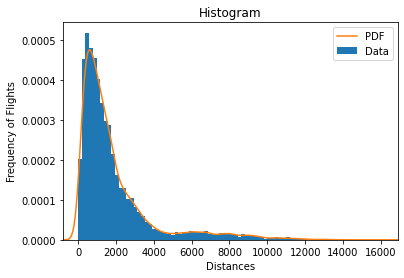

In [ ]:
'''
Code challenge #4
'''

#import libraries for histogram plotting and designing 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

#plots the histogram 
plt.hist(dists, density=True, bins=100, label="Data")

#adds data labels, trend lines, and other aesthetic details to the histogram 
mn, mx = plt.xlim()                                    
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(dists)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper right")
plt.ylabel('Frequency of Flights')
plt.xlabel('Distances')
plt.title("Histogram");
